### Primer paso

In [29]:
import importlib
import lib
importlib.reload(lib)

mipymes, tasas = lib.cargar_json("data/datos_entrenamiento.json")

print("DICCIONARIO DE MIPYMES\n")
print(mipymes)

print("\nTASAS DE CAMBIO DEL TOQUE \n")
print(tasas)

DICCIONARIO DE MIPYMES

[{'mipyme_id': 'MYP001', 'direccion': 'Calle 95 entre A y B, La Habana', 'region': 'Cerro', 'coordenadas': {'lat': 23.122414, 'lon': -82.361295}, 'distancia_al_hospital_km': 0.92, 'fecha_recoleccion': '2025-11-09', 'productos_hospitalarios': [{'nombre': 'Shampoo suave', 'categoria': 'higiene', 'marca': "Johnson's", 'unidad': 'ml', 'origen': 'importado', 'precio_cup': 336.82, 'peso_neto': 200.0, 'producto_infantil': True}, {'nombre': 'Jabón', 'categoria': 'higiene', 'marca': 'Dove Baby', 'unidad': 'unidad', 'origen': 'importado', 'precio_cup': 115.32, 'peso_neto': None, 'producto_infantil': True}, {'nombre': 'Pasta dental', 'categoria': 'higiene', 'marca': 'Colgate Kids', 'unidad': 'g', 'origen': 'importado', 'precio_cup': 523.51, 'peso_neto': 50.0, 'producto_infantil': True}, {'nombre': 'Galletas dulces ', 'categoria': 'Galletas dulces', 'marca': '', 'unidad': 'g', 'origen': 'importado', 'precio_cup': 416.36, 'peso_neto': 100.0, 'producto_infantil': False}, {'no

In [14]:
#CALCULAR PRECIO MINIMO POR PRODUCTO
peso_minimo = lib.peso_minimo_por_producto(mipymes)
print(peso_minimo)

{'shampoo suave': 200.0, 'pasta dental': 50.0, 'galletas dulces': 100.0, 'jugos': 330.0, 'compotas': 120.0, 'pañales': 10, 'toallitas húmedas': 20, 'crema protectora': 30.0, 'agua embotellada': 500.0}


In [30]:
# CALCULAR COSTO ESTANDARIZADO POR MIPYME DE NUESTRA CANASTA HOSPITALARIA
for mipyme in mipymes:
    costo = lib.costo_canasta_estandarizada(mipyme, peso_minimo)
    print(f"{mipyme["mipyme_id"]} => {costo}CUP")
    
# ALGUNAS MIPYMES NO PODRIAN TENER TODOS LOS PRODUCTOS DE LA CANASTA SEMANAL
# SI SUMAMOS DIRECTAMENTE LOS PRECIOS PROMEDIOS ESTANDARIZADOS, OMITIMOS LOS FALTANTES
# Y ESO SUBESTIMA EL COSTO REAL
# POR TANTO ESTO ACA ES UN COSTO PARCIAL DE LA CANASTA SEMANAL
#=> se estandarizan los precios de los productos de la canasta hospitalaria de aqui
# y se hace un promedio de dichos productos

MYP001 => 3163.12CUP
MYP002 => 3351.14CUP
MYP003 => 3709.59CUP
MYP004 => 3387.43CUP
MYP005 => 4218.83CUP
MYP006 => 3288.66CUP
MYP007 => 3379.28CUP
MYP008 => 3320.23CUP
MYP009 => 3630.16CUP
MYP010 => 2969.45CUP
MYP011 => 4203.73CUP
MYP012 => 2436.44CUP
MYP013 => 3275.51CUP
MYP014 => 2871.66CUP
MYP015 => 3246.2CUP
MYP016 => 2442.82CUP
MYP017 => 3080.57CUP
MYP018 => 3077.61CUP
MYP019 => 3805.45CUP
MYP020 => 2541.57CUP
MYP021 => 3470.01CUP
MYP022 => 3539.96CUP
MYP023 => 3486.67CUP
MYP024 => 3513.96CUP
MYP025 => 3648.07CUP
MYP026 => 2614.94CUP
MYP027 => 4273.0CUP
MYP028 => 3068.43CUP
MYP029 => 3366.17CUP
MYP030 => 1875.84CUP


In [31]:
# CALCULAR EL PORCIENTO DEL SALARIO ESTATAL CONSUMIDO

for mipyme in mipymes:
    costo= lib.costo_canasta_estandarizada(mipyme, peso_minimo)
    porcentaje = lib.porcentaje_salario(costo)
    print(f"{mipyme['mipyme_id']} => {porcentaje}% del salario ")



MYP001 => 63.26% del salario 
MYP002 => 67.02% del salario 
MYP003 => 74.19% del salario 
MYP004 => 67.75% del salario 
MYP005 => 84.38% del salario 
MYP006 => 65.77% del salario 
MYP007 => 67.59% del salario 
MYP008 => 66.4% del salario 
MYP009 => 72.6% del salario 
MYP010 => 59.39% del salario 
MYP011 => 84.07% del salario 
MYP012 => 48.73% del salario 
MYP013 => 65.51% del salario 
MYP014 => 57.43% del salario 
MYP015 => 64.92% del salario 
MYP016 => 48.86% del salario 
MYP017 => 61.61% del salario 
MYP018 => 61.55% del salario 
MYP019 => 76.11% del salario 
MYP020 => 50.83% del salario 
MYP021 => 69.4% del salario 
MYP022 => 70.8% del salario 
MYP023 => 69.73% del salario 
MYP024 => 70.28% del salario 
MYP025 => 72.96% del salario 
MYP026 => 52.3% del salario 
MYP027 => 85.46% del salario 
MYP028 => 61.37% del salario 
MYP029 => 67.32% del salario 
MYP030 => 37.52% del salario 


### Calcular la normalizacion promedio del producto p001 (aceite comestible) 


In [32]:
from collections import defaultdict

#que es defaultdict
# Es una estructura de datos de Python que proviene del modulo collections
# es como un diccionario pero si accedes a una clave que no existe en lugar de lanzar un error crea una lista vacia
# u otro tipo si lo defines

d = defaultdict(list)
d["productos"].append(100)
print(d)

print(d["ala"]) # devuelve una lista vacia
# con esta nueva clase evitamos escribir d["ala"] = []


defaultdict(<class 'list'>, {'productos': [100]})
[]


In [ ]:
# VARIEDAD POR CERCANIA
resultado = variedad

In [33]:
canasta = {
    "Shampoo suave": {
        "cantidad": 1,
        "unidad": "ml",
        "peso_neto_referencia": 200
    },
    "Jabón": {
        "cantidad": 2,
        "unidad": "unidad",
        "peso_neto_referencia": None
    },
    "Pasta dental": {
        "cantidad": 1,
        "unidad": "g",
        "peso_neto_referencia": 50
    },
    "Toallitas húmedas": {
        "cantidad": 3,
        "unidad": "unidad",
        "peso_neto_referencia": 20
    },
    "Pañales": {
        "cantidad": 21,
        "unidad": "unidad",
        "peso_neto_referencia": 1
    },
    "Crema protectora": {
        "cantidad": 1,
        "unidad": "g",
        "peso_neto_referencia": 30
    },
    "Compotas": {
        "cantidad": 7,
        "unidad": "g",
        "peso_neto_referencia": 120
    },
    "Jugos": {
        "cantidad": 7,
        "unidad": "ml",
        "peso_neto_referencia": 330
    },
    
"Galletas dulces Oreo": {
        "cantidad": 4,
        "unidad": "g",
        "peso_neto_referencia": 100
    },
    "Agua embotellada": {
        "cantidad": 7,
        "unidad": "ml",
        "peso_neto_referencia": 500
    }
}
costo_total =  lib.costo_canasta_semanal_promedio(mipymes, peso_minimo, canasta)

print(f"Costo semanal de la canasta infantil: {costo_total} CUP")


Costo semanal de la canasta infantil: 16832.7 CUP


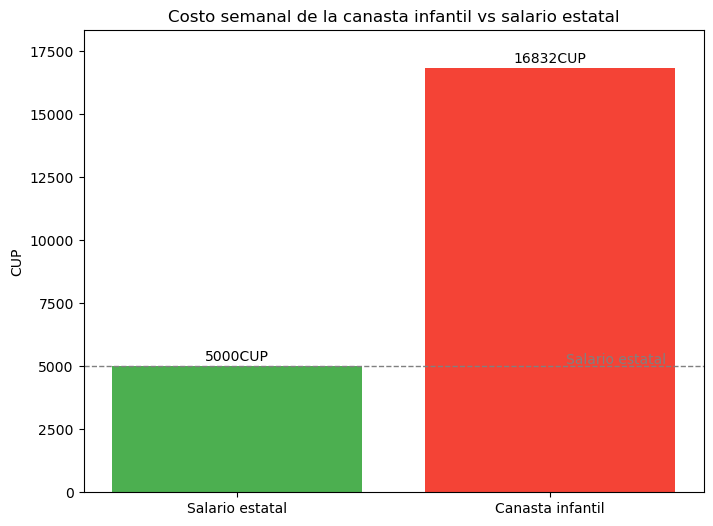

In [34]:
lib.visuzalizar_canasta_vs_salario(costo_total)